У нас есть данные Яндекс.Афиши с июня 2017 по конец мая 2018 года: лог сервера с данными о посещениях сайта Яндекс.Афиши, выгрузка всех заказов за этот период, рекламные расходы.
Необходимо помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет.

Предстоит изучить:

    как клиенты пользуются сервисом,
    когда делают первые покупки на сайте,
    сколько денег приносит компании каждый клиент,
    когда расходы на привлечение клиента окупаются.


# Аналитика в Яндекс.Афише
## Оглавление:
* [Импортировать файлы и изучить данные в них](#first-bullet)
* [Постройте отчёты и посчитайте метрики](#second-bullet)
* [Продукт](#third-bullet)
* [Продажи](#fourth-bullet)
* [Маркетинг](#fifth-bullet)
* [Вывод](#sixth-bullet)

## Импортировать файлы и изучить данные в них. <a name="first-bullet"></a>

In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')
visits

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [2]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [3]:
visits['Device'].value_counts()

desktop    262567
touch       96833
Name: Device, dtype: int64

In [4]:
visits.duplicated().sum()

0

Таблица с визитами содержит 359400 строк и 5 столбцов. Пропусков и дубликатов нет. Стоблцы с датами имеют тип object. Названия столбцов не удобны для использования. 

In [5]:
orders

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [6]:
orders.Uid.nunique()

36523

In [7]:
orders['Revenue'].value_counts()

1.83       2552
2.44       2464
3.67       2421
1.22       2216
3.05       2041
           ... 
7.56          1
7.55          1
1236.28       1
14.27         1
107.55        1
Name: Revenue, Length: 1149, dtype: int64

In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [9]:
orders.duplicated().sum()

0

Таблица с заказами состоит из 50415 строк и 3 столбцов. Пропусков и дубликатов нет. Стобец с датой заказа имеет тип object. Названия столбцов также состоят из строчных и прписных букв, и содержат пробелы. 

In [10]:
costs

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [11]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [12]:
costs.duplicated().sum()

0

Таблица с расходами состоит из 2542 строк и 3 столбцов. Пропусков и дубликатов нет. Даты расходов имеют тип object. 

In [13]:
# Приведем к нижнему регистру названия столбцов таблиц visits и orders
visits.columns = [col.lower().replace(' ', '_') for col in visits.columns]
orders.columns = [col.lower().replace(' ', '_') for col in orders.columns]

Переведем даты к типу datetime.

In [14]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
costs['dt'] = pd.to_datetime(costs['dt'])
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [15]:
visits['start_ts'].describe()

count                  359400
unique                 224303
top       2017-11-24 16:06:00
freq                       19
first     2017-06-01 00:01:00
last      2018-05-31 23:59:00
Name: start_ts, dtype: object

In [16]:
orders['buy_ts'].describe()

count                   50415
unique                  45991
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-06-01 00:02:00
Name: buy_ts, dtype: object

In [17]:
costs['dt'].describe()

count                    2542
unique                    364
top       2018-03-03 00:00:00
freq                        7
first     2017-06-01 00:00:00
last      2018-05-31 00:00:00
Name: dt, dtype: object

Все таблицы содержат данные за период с 01.06.2017 по 31.05.2018. В таблице orders дата последнего заказа 01.06.2018 00:02:00 - это заказ, сессия которого началась 31.05.2020.
Все столбцы с датами переведены к типу datetime, названия столбцов в таблицах приведены к единому типу.

## Постройте отчёты и посчитайте метрики <a name="second-bullet"></a>

### Продукт <a name="third-bullet"></a>

    Сколько людей пользуются в день, неделю, месяц?
    Сколько сессий в день?
    Сколько длится одна сессия?
    Как часто люди возвращаются?

##### Сколько людей пользуются в день, неделю, месяц?

In [18]:
# Добавим в талицу visits столбцы с днем, месяцем и неделей
visits['session_week'] = visits['start_ts'].astype('datetime64[W]')
visits['session_month'] = visits['start_ts'].astype('datetime64[M]')
visits['session_day'] = visits['start_ts'].astype('datetime64[D]')
visits

,device,end_ts,source_id,start_ts,uid,session_week,session_month,session_day
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-14,2017-12-01,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-15,2018-02-01,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-06-29,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-17,2018-05-01,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-21,2017-12-01,2017-12-27
...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-27,2017-07-01,2017-07-29
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25,2018-01-01,2018-01-25
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-01,2018-03-01,2018-03-03
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02,2017-11-01,2017-11-02


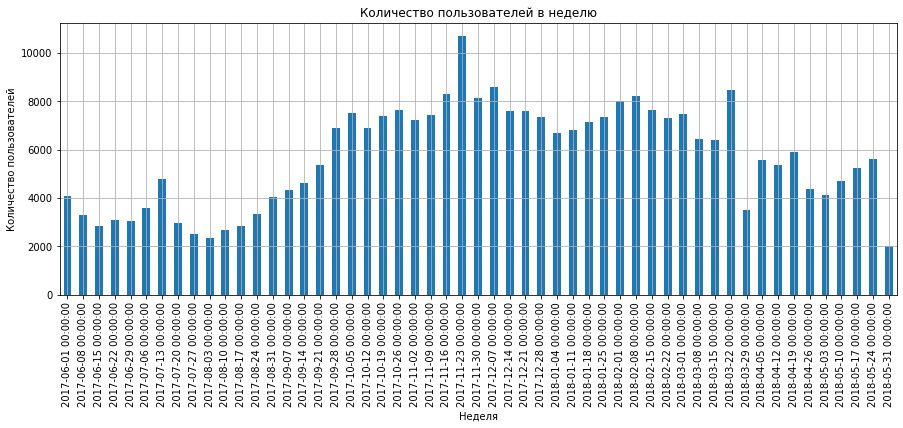

In [19]:
# Пользователей в неделю
week_visits_count = visits.groupby('session_week')['uid'].nunique()
week_visits_count.plot(kind='bar',figsize=(15, 5),grid=True)
plt.title('Количество пользователей в неделю')
plt.ylabel('Количество пользователей')
plt.xlabel('Неделя')
plt.show()

In [20]:
week_visits_count.describe()

count       53.000000
mean      5724.415094
std       2096.119936
min       1997.000000
25%       4056.000000
50%       5894.000000
75%       7441.000000
max      10716.000000
Name: uid, dtype: float64

Больше всего людей посещают сайт Яндекс.Афиши с конца сентября по конец марта. Среднее количество посещений в неделю составляет - 5724 чел., медиана - 5894 чел. Максимальное число пользователей (10716 чел.) заходило на сайт на неделе в конце ноября 2017г. Меньше всего пользователей посещают сайт в летние месяцы, что можно объяснить периодом дач и отпусков.

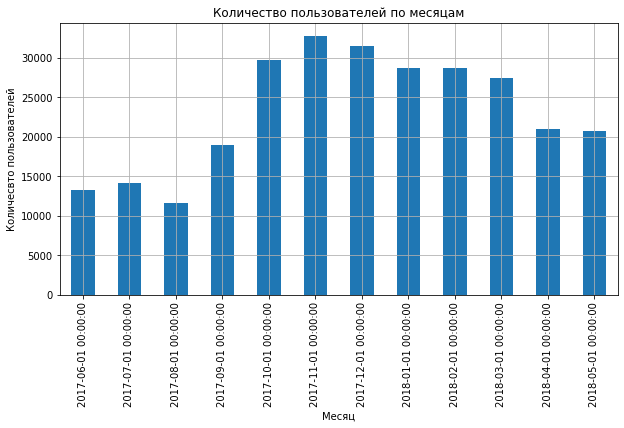

In [21]:
# Пользователей в месяц
month_visits_count = visits.groupby('session_month')['uid'].nunique()
month_visits_count.plot(kind='bar',figsize=(10, 5),grid=True)
plt.title('Количество пользователей по месяцам')
plt.ylabel('Количесвто пользователей')
plt.xlabel('Месяц')
plt.show()

In [22]:
month_visits_count.describe()

count       12.000000
mean     23228.416667
std       7546.380462
min      11631.000000
25%      17777.000000
50%      24240.500000
75%      28984.750000
max      32797.000000
Name: uid, dtype: float64

Максимальное количество людей заходило на сайт в ноябре 2017 года (32797чел.), минимальное - в августе 2017г. (11631чел.). Медиана посетителей за месяц - 24240чел.

In [23]:
# Пользователей в день
day_visits_count = visits.groupby('session_day')['uid'].nunique()
day_visits_count.name = 'day_visits_count'
day_visits_count.describe()

count     364.000000
mean      907.991758
std       370.513838
min         1.000000
25%       594.000000
50%       921.000000
75%      1173.000000
max      3319.000000
Name: day_visits_count, dtype: float64

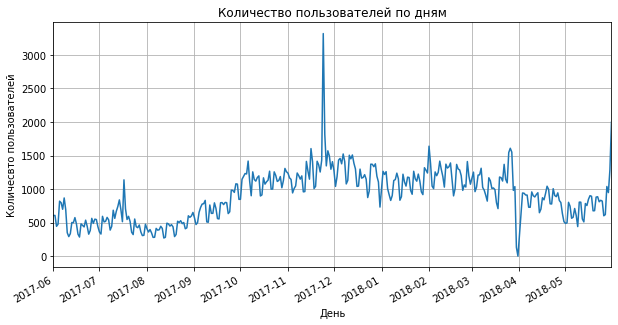

In [24]:
day_visits_count.plot(grid=True, figsize=(10, 5))
plt.title('Количество пользователей по дням')
plt.ylabel('Количесвто пользователей')
plt.xlabel('День')
plt.show()

Средняя посещаемость в день составляет - 907 чел. При этом, в конце ноября сайт посетило 3319чел. - почти в четыре раза больше среднего и в два раза больше максимальных значений, чем в остальные дни осенне-зимнего периода.
Праздников и каникул в этот период нет, поэтому, скорее всего, это был день распродаж в "черную пятницу". В конце марта самые низкие показатели посещений (30/03 - 131 чел. и 31/03 - 1чел.) - видимо были какие-то неполадки с сайтом.
Больше всего людей посещают сайт Яндекс.Афиши с конца сентября по конец марта. Среднее количество посещений в неделю составляет - 5724 чел., медиана - 5894 чел. Максимальное число пользователей (10716 чел.) заходило на сайт на неделе в конце ноября 2017г. Меньше всего пользователей посещают сайт в летние месяцы, что можно объяснить периодом дач и отпусков.
Максимальное количество людей заходило на сайт в ноябре 2017 года (32797чел.), минимальное - в августе 2017г. (11631чел.). Медиана посетителей за месяц - 24240чел.

##### Сколько сессий в день?

In [25]:
day_session_count = visits.groupby('session_day')['start_ts'].count()
day_session_count.describe()

count     364.000000
mean      987.362637
std       418.994796
min         1.000000
25%       635.500000
50%      1003.000000
75%      1280.000000
max      4042.000000
Name: start_ts, dtype: float64

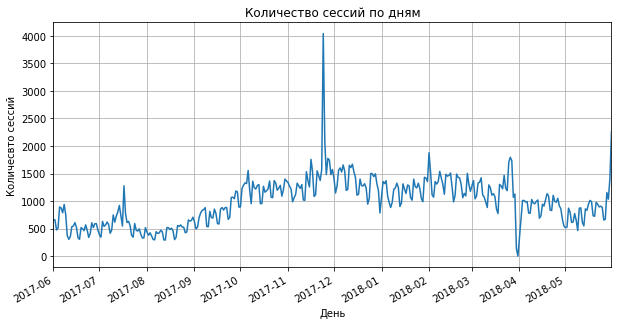

In [26]:
day_session_count.plot(grid=True, figsize=(10, 5))
plt.title('Количество сессий по дням')
plt.ylabel('Количесвто сессий')
plt.xlabel('День')
plt.show()

Количество сессий по дням распределяется на графике так же, как и количесвто пользователей по дням, но сами значения немного больше. Среднее количество сессий в день за год - 987.


##### Сколько длится одна сессия?

In [27]:
# Добавим столбец с продолжительностью сессии. Для это вычтем из времени окончания время начала сессии
visits['session_duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
visits['session_duration'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration, dtype: float64

In [28]:
#visits.sort_values('session_duration')

In [29]:
visits[visits['uid'] == 13092152539246794986]

,device,end_ts,source_id,start_ts,uid,session_week,session_month,session_day,session_duration
4181,desktop,2018-03-25 03:18:00,3,2018-03-25 03:50:00,13092152539246794986,2018-03-22,2018-03-01,2018-03-25,84480
5845,desktop,2018-03-17 17:55:00,2,2018-03-17 17:55:00,13092152539246794986,2018-03-15,2018-03-01,2018-03-17,0
92428,desktop,2018-05-21 13:04:00,4,2018-05-21 13:03:00,13092152539246794986,2018-05-17,2018-05-01,2018-05-21,60
96975,desktop,2017-11-21 02:00:00,1,2017-11-21 01:24:00,13092152539246794986,2017-11-16,2017-11-01,2017-11-21,2160
100434,desktop,2017-11-27 14:44:00,1,2017-11-27 14:38:00,13092152539246794986,2017-11-23,2017-11-01,2017-11-27,360
124663,desktop,2018-04-15 14:58:00,9,2018-04-15 14:57:00,13092152539246794986,2018-04-12,2018-04-01,2018-04-15,60
159507,desktop,2018-05-31 12:30:00,4,2018-05-31 12:12:00,13092152539246794986,2018-05-31,2018-05-01,2018-05-31,1080
230629,desktop,2017-11-12 16:53:00,1,2017-11-12 16:49:00,13092152539246794986,2017-11-09,2017-11-01,2017-11-12,240
285336,desktop,2017-11-28 18:36:00,1,2017-11-28 18:28:00,13092152539246794986,2017-11-23,2017-11-01,2017-11-28,480
297902,desktop,2017-11-17 01:17:00,3,2017-11-17 00:34:00,13092152539246794986,2017-11-16,2017-11-01,2017-11-17,2580


In [30]:
visits[visits['session_duration'] > 18000]

,device,end_ts,source_id,start_ts,uid,session_week,session_month,session_day,session_duration
1197,desktop,2017-07-21 20:06:00,1,2017-07-21 11:04:00,2909927403543287328,2017-07-20,2017-07-01,2017-07-21,32520
4181,desktop,2018-03-25 03:18:00,3,2018-03-25 03:50:00,13092152539246794986,2018-03-22,2018-03-01,2018-03-25,84480
21110,touch,2017-12-08 18:23:00,2,2017-12-08 12:50:00,519541391666399429,2017-12-07,2017-12-01,2017-12-08,19980
21283,desktop,2017-08-11 19:43:00,1,2017-08-11 13:31:00,2909927403543287328,2017-08-10,2017-08-01,2017-08-11,22320
28877,desktop,2017-11-24 23:31:00,2,2017-11-24 18:18:00,9987774188927308990,2017-11-23,2017-11-01,2017-11-24,18780
30111,desktop,2017-06-08 17:40:00,2,2017-06-08 10:40:00,12780042542370479493,2017-06-08,2017-06-01,2017-06-08,25200
35372,touch,2017-11-28 23:02:00,2,2017-11-28 17:48:00,15087020441867378244,2017-11-23,2017-11-01,2017-11-28,18840
35634,desktop,2017-12-14 20:07:00,4,2017-12-14 13:46:00,16871666708928324976,2017-12-14,2017-12-01,2017-12-14,22860
37815,desktop,2017-10-27 18:22:00,2,2017-10-27 11:47:00,12780042542370479493,2017-10-26,2017-10-01,2017-10-27,23700
38807,desktop,2018-02-12 16:28:00,1,2018-02-12 10:27:00,617511521718217007,2018-02-08,2018-02-01,2018-02-12,21660


Как правило одна сессия длится от 2 до 14 минут, среднее время сессии - 10,7 минут, медиана - 5 минут. Но есть и такие, которые длятся по несколько часов, и скорее всего это происходит в результате того, что пользователи не закрывают вкладку в браузере. Также есть два пользователя, которые покинули сайт раньше, чем вошли - может именно в этот момент сбилось время на хостинге или настройки на сайте?

##### Как часто люди возвращаются?

In [31]:
# Чтобы ответить на этот вопрос посчитаем количество входов на сайт у каждого пользователя
visits_count = visits.groupby('uid').agg({'start_ts':'count'}).reset_index()
visits_count.columns = ['uid', 'visits_count']
visits_count['visits_count'].value_counts().head(10)

1     176041
2      30926
3      10184
4       4357
5       2283
6       1243
7        807
8        513
9        356
10       239
Name: visits_count, dtype: int64

In [32]:
visits_count['visits_count'].describe()

count    228169.000000
mean          1.575148
std           4.646800
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         893.000000
Name: visits_count, dtype: float64

In [33]:
visits_count.sort_values('visits_count', ascending=False).head(10)

,uid,visits_count
159301,12869801667763685675,893
40367,3263486045884611639,615
139405,11255648391090536411,551
210837,17030528792926543083,357
99840,8056418121947262981,343
50758,4103526784471735383,321
111576,9019681082555518724,314
167649,13551952738594011920,309
128740,10403169074343195591,303
143872,11616947936617491261,302


Из 359400 посещений сайта 228169 было совершено уникальными пользователями. Большинство людей (176041 чел.) зашли на сайт только один раз. Возвращаются 22,8% (52128 чел.) из всех пользователей. В среднем каждый пользователь возвращается 1,57 раз. Медиана количества посещений - 1.

Средняя посещаемость в день составляет - 907 чел. При этом, в конце ноября сайт посетило 3319чел. - почти в четыре раза больше среднего и в два раза больше максимальных значений, чем в остальные дни "холодных" месяцев.
Правзников и каникул в этот период нет, поэтому, скорее всего, это был день распродаж в "черную пятницу". В конце марта саные низкие показатели посещений (30/03 - 131 чел. и 31/03 - 1чел.) - видимо были какие-то неполадки с сайтом.


Больше всего людей посещают сайт Яндекс.Афиши с конца сентября по конец марта. Среднее количество посещений в неделю составляет - 5724 чел., медиана - 5894 чел. Максимальное число пользователей (10716 чел.) заходило на сайт на неделе в конце ноября 2017г. Меньше всего пользователей посещают сайт в летние месяцы, что можно объяснить периодом дач и отпусков.


Максимальное количество людей заходило на сайт в ноябре 2017 года (32797чел.), минимальное - в августе 2017г. (11631чел.). Медиана посетителей за месяц - 24240чел.
Количество сессий по дням распределяется на графике так же, как и количесвто пользователей по дням, но сами значения немного больше. Среднее количество сессий в день за год - 987.


Как правило одна сессия длится от 2 до 14 минут, а чаще всего она занимает 5 минут. 

In [34]:
# Добавим дату первого визита
first_visits = visits.groupby('uid').agg({'start_ts':'min'}).reset_index()
first_visits.columns = ['uid', 'first_visit']
first_visits['first_visit'] = first_visits['first_visit'].astype('datetime64[M]')
visits_1 = visits.merge(first_visits, on='uid')
visits_1

,device,end_ts,source_id,start_ts,uid,session_week,session_month,session_day,session_duration,first_visit
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-14,2017-12-01,2017-12-20,1080,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-15,2018-02-01,2018-02-19,1680,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-06-29,2017-07-01,2017-07-01,0,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-17,2018-05-01,2018-05-20,1440,2018-03-01
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-08,2018-03-01,2018-03-09,1680,2018-03-01
...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2018-04-23 21:19:00,10,2018-04-23 21:11:00,12734910664455613822,2018-04-19,2018-04-01,2018-04-23,480,2018-04-01
359396,desktop,2017-11-08 13:39:00,4,2017-11-08 13:39:00,6761309174945977743,2017-11-02,2017-11-01,2017-11-08,0,2017-11-01
359397,desktop,2017-07-31 12:31:00,3,2017-07-31 12:13:00,11102751930812818282,2017-07-27,2017-07-01,2017-07-31,1080,2017-07-01
359398,desktop,2018-03-20 15:25:00,4,2018-03-20 15:11:00,272012551460639309,2018-03-15,2018-03-01,2018-03-20,840,2018-03-01


In [35]:
# Посчитаем количество пользователей
cohort_size = visits_1.groupby('first_visit').agg({'uid':'nunique'}).reset_index()
cohort_size.columns = ['first_visit', 'new_visiters']
cohort_size.head()

,first_visit,new_visiters
0,2017-06-01,13259
1,2017-07-01,13140
2,2017-08-01,10181
3,2017-09-01,16704
4,2017-10-01,25977


In [36]:
visits_1['lifetime'] =  ((visits_1['session_month'] - visits_1['first_visit']) / np.timedelta64(1, 'M'))\
        .round().astype('int')
visits_1

,device,end_ts,source_id,start_ts,uid,session_week,session_month,session_day,session_duration,first_visit,lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-14,2017-12-01,2017-12-20,1080,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-15,2018-02-01,2018-02-19,1680,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-06-29,2017-07-01,2017-07-01,0,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-17,2018-05-01,2018-05-20,1440,2018-03-01,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-08,2018-03-01,2018-03-09,1680,2018-03-01,0
...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2018-04-23 21:19:00,10,2018-04-23 21:11:00,12734910664455613822,2018-04-19,2018-04-01,2018-04-23,480,2018-04-01,0
359396,desktop,2017-11-08 13:39:00,4,2017-11-08 13:39:00,6761309174945977743,2017-11-02,2017-11-01,2017-11-08,0,2017-11-01,0
359397,desktop,2017-07-31 12:31:00,3,2017-07-31 12:13:00,11102751930812818282,2017-07-27,2017-07-01,2017-07-31,1080,2017-07-01,0
359398,desktop,2018-03-20 15:25:00,4,2018-03-20 15:11:00,272012551460639309,2018-03-15,2018-03-01,2018-03-20,840,2018-03-01,0


In [37]:
cohort = visits_1.groupby(['first_visit', 'lifetime']).agg({'uid':'nunique'}).reset_index()
cohort = cohort.rename(columns={'uid':'count_users'})
cohort = cohort.merge(cohort_size, on='first_visit')
cohort

,first_visit,lifetime,count_users,new_visiters
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259
...,...,...,...,...
73,2018-03-01,1,861,20589
74,2018-03-01,2,557,20589
75,2018-04-01,0,15709,15709
76,2018-04-01,1,760,15709


In [38]:
# Разделим количество активных пользователей в месяце на исходное число пользователей в когорте
cohort['retention'] = cohort['count_users']/cohort['new_visiters'] 
retention_pivot = cohort.pivot_table(index='first_visit',columns='lifetime',values='retention',aggfunc='sum')
retention_pivot

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_visit,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


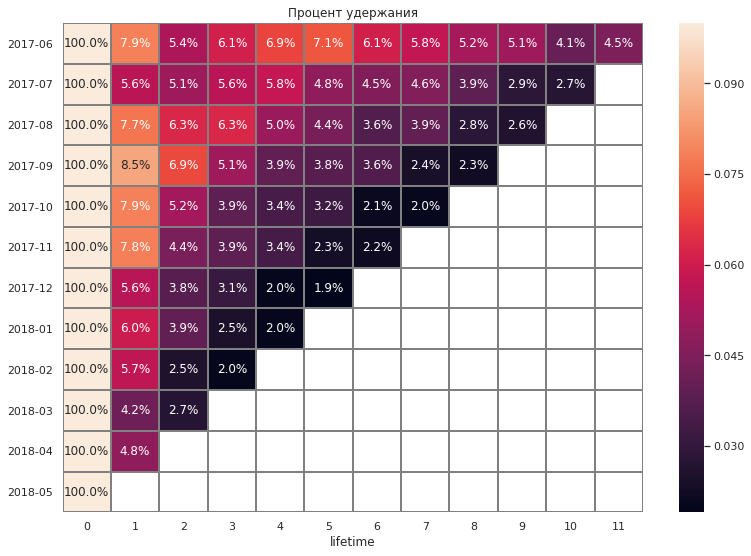

In [39]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Процент удержания')
retention_pivot.index = retention_pivot.index.strftime('%Y-%m')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmax=0.1)
plt.show()

Средний Retention Rate в первые месяцы по когортам составил 6,5%. В когортах с июня по ноябрь этот показатель выше, среднее - 7,5%. Со временем процент удержания пользователей падает. И если рассматривать его за одинаковый период жизни когорты, то у каждой последующей когорты Retention Rate снижается быстрее. Так, например, у июньской когорты к шестому месяцу существования Retention Rate составил 7,1%, а у ноябрьской за этот же период 2,3%. Возможно, тут сказывается сезонность. К апрелю у большинтва когорт Retention Rate в районе 2-2,9%.

### Продажи <a name="fourth-bullet"></a>

    1.Когда люди начинают покупать?
    2.Сколько раз покупают за период?
    3.Какой средний чек?
    4.Сколько денег приносят? (LTV)

##### 1.Когда люди начинают покупать?

In [40]:
# Узнаем время первого визита каждым пользователем
# first_visits = visits.groupby('uid').agg({'start_ts':'min'}).reset_index()
# first_visits.columns = ['uid', 'first_visit']
# first_visits['first_visit'] = first_visits['first_visit'].astype('datetime64[M]')
# visits_1 = visits.merge(first_visits, on='uid')
# visits_1

In [41]:
# Узнаем время первой покупки посетителей сайта
first_orders = orders.groupby('uid').agg({'buy_ts':'min'}).reset_index()
first_orders.columns = ['uid', 'first_order']
first_orders['first_order'] = first_orders['first_order'].astype('datetime64[M]')
first_orders

,uid,first_order
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01
...,...,...
36518,18445147675727495770,2017-11-01
36519,18445407535914413204,2017-09-01
36520,18445601152732270159,2018-03-01
36521,18446156210226471712,2018-02-01


In [42]:
# Объединим две таблицы в одну и посчитаем сколько времени прошло между первым посещением и первой покупкой
when_first_orders = pd.merge(first_orders, first_visits, on='uid')
when_first_orders['time_to_buy'] = when_first_orders['first_order'] - when_first_orders['first_visit']
when_first_orders

,uid,first_order,first_visit,time_to_buy
0,313578113262317,2018-01-01,2017-09-01,122 days
1,1575281904278712,2017-06-01,2017-06-01,0 days
2,2429014661409475,2017-10-01,2017-10-01,0 days
3,2464366381792757,2018-01-01,2018-01-01,0 days
4,2551852515556206,2017-11-01,2017-11-01,0 days
...,...,...,...,...
36518,18445147675727495770,2017-11-01,2017-08-01,92 days
36519,18445407535914413204,2017-09-01,2017-09-01,0 days
36520,18445601152732270159,2018-03-01,2017-08-01,212 days
36521,18446156210226471712,2018-02-01,2017-11-01,92 days


In [43]:
# Округлим до дней
when_first_orders['time_to_buy'] = when_first_orders['time_to_buy'].astype('timedelta64[D]').round()
when_first_orders['time_to_buy'].describe()

count    36523.000000
mean        16.604496
std         46.826156
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        334.000000
Name: time_to_buy, dtype: float64

In [44]:
when_first_orders['time_to_buy'].value_counts()

0.0      30087
31.0      1141
30.0       957
61.0       691
92.0       496
153.0      283
122.0      243
151.0      230
62.0       214
28.0       202
120.0      194
123.0      186
59.0       176
90.0       162
212.0      138
181.0      136
184.0      106
91.0       102
273.0       89
183.0       78
243.0       75
89.0        70
245.0       64
215.0       62
214.0       59
304.0       59
334.0       54
182.0       49
121.0       45
242.0       42
274.0       33
Name: time_to_buy, dtype: int64

82% совершают покупку в день первого посещения.

##### 2.Сколько раз покупают за период?

In [45]:
# Посчитаем количество покупок, совершенных каждым пользователем
#orders_count_by_user = orders.query('"2017-06-01" < buy_ts < "2017-12-01"')
orders_count_by_user = orders.groupby('uid').agg({'buy_ts':'count'}).reset_index()
orders_count_by_user['buy_ts'].value_counts()

1      30231
2       4395
3       1086
4        375
5        147
       ...  
239        1
47         1
31         1
46         1
238        1
Name: buy_ts, Length: 62, dtype: int64

In [46]:
orders_count = orders_count_by_user['buy_ts'].sum()
orders_count

50415

In [47]:
orders_count_by_user['buy_ts'].describe()

count    36523.000000
mean         1.380363
std          3.454461
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        239.000000
Name: buy_ts, dtype: float64

Всего за год 36523 пользователя совершили 50415 покупок. При этом, большинство покупателей (82,77% - 30231чел.) совершают покупку только один раз. Среднее количество покупок на пользователя за год - 1,38 раза.

In [48]:
# Добавим месяц первой покупки каждого покупателя в таблицу с заказами
orders = orders.merge(first_orders, on='uid')
orders['first_order'] = orders['first_order'].astype('datetime64[M]')
orders['buy_ts'] = orders['buy_ts'].astype('datetime64[M]')

In [49]:
size = orders.groupby('first_order').agg({'uid':'nunique'}).reset_index()
size.columns = ['first_order', 'new_buyers']
size.head()

,first_order,new_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [50]:
orders['lifetime'] =  ((orders['buy_ts'] - orders['first_order']) / np.timedelta64(1, 'M'))\
        .round().astype('int')

In [51]:
cohort_orders = orders.groupby(['first_order', 'lifetime']).agg({'uid':'nunique', 'revenue':'count'}).reset_index()
cohort_orders = cohort_orders.rename(columns={'uid':'count_buyers', 'revenue':'count_orders'})
cohort_orders = cohort_orders.merge(size, on='first_order')
cohort_orders

,first_order,lifetime,count_buyers,count_orders,new_buyers
0,2017-06-01,0,2023,2354,2023
1,2017-06-01,1,61,177,2023
2,2017-06-01,2,50,174,2023
3,2017-06-01,3,54,226,2023
4,2017-06-01,4,88,292,2023
...,...,...,...,...,...
74,2018-03-01,2,58,176,3533
75,2018-04-01,0,2276,2495,2276
76,2018-04-01,1,69,195,2276
77,2018-05-01,0,2988,3249,2988


In [52]:
# Разделим количество активных пользователей в месяце на исходное число пользователей в когорте

cohort_orders['retention'] = cohort_orders['count_orders']/cohort_orders['new_buyers'] 
pivot = cohort_orders.pivot_table(index='first_order',columns='lifetime',values='retention',aggfunc='mean')
pivot = pivot.cumsum(axis=1).round(2)
pivot

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order,,,,,,,,,,,,
2017-06-01,1.16,1.25,1.34,1.45,1.59,1.70,1.84,1.92,2.03,2.10,2.15,2.19
2017-07-01,1.14,1.19,1.25,1.31,1.34,1.39,1.42,1.44,1.47,1.49,1.51,NaN
2017-08-01,1.12,1.20,1.27,1.33,1.39,1.44,1.47,1.53,1.56,1.60,NaN,NaN
2017-09-01,1.14,1.22,1.28,1.35,1.37,1.42,1.46,1.48,1.50,NaN,NaN,NaN
2017-10-01,1.14,1.22,1.25,1.28,1.31,1.34,1.35,1.38,NaN,NaN,NaN,NaN
2017-11-01,1.18,1.28,1.32,1.37,1.41,1.42,1.45,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.15,1.21,1.26,1.30,1.32,1.34,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.12,1.19,1.24,1.25,1.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.12,1.18,1.21,1.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


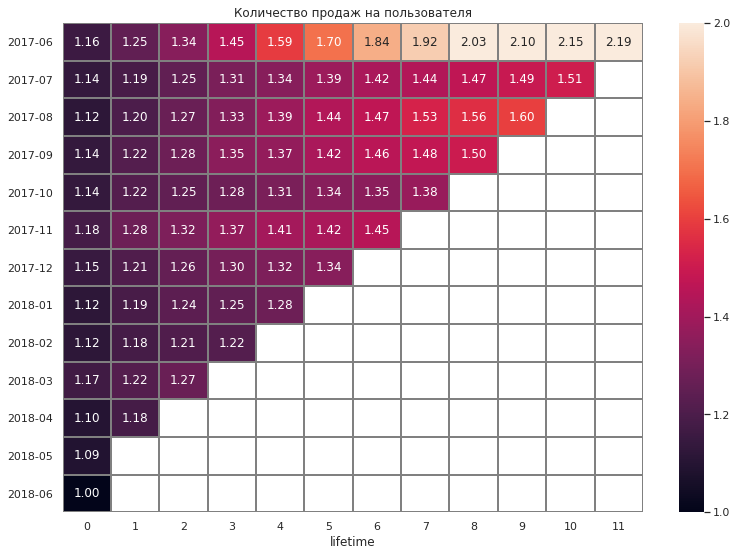

In [53]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Количество продаж на пользователя')
pivot.index = pivot.index.strftime('%Y-%m')
sns.heatmap(pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray', vmax=2)
plt.show()

In [54]:
print('За шесть месяцев каждый покупатель совершает покупку в среднем {:.2f}'.format(pivot[5].mean()), 'раз')

За шесть месяцев каждый покупатель совершает покупку в среднем 1.44 раз


Так как когорты прожили разное количество времени, возьмем период в 6 месяцев: с июня по декабрь. Считаю его оптимальным, т.к. охватывает половину всех когорт, все возможные сезоны и, думаю, это максимальный срок, который можно ждать окупаемости от рекламы такого продукта.
В среднем за пол года каждый покупатель делает 1,44 покупок. Больше всего их совершается в первый месяц жизни когорты. К шестому месяцу самые лучшие показатели у июньской когорты, ее пользователи за этот период делают покупки 1,7 раз. В остальных когортах рост идет гораздо медленнее.

##### 3.Какой средний чек?

In [55]:
orders['revenue'].describe()

count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64

In [56]:
orders['revenue'].sum()

252057.2

За весь период средний чек покупателя равен 4,99 у.е., медиана - 2,50 у.е.


In [57]:
# Сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа, сложим выручку и посчитаем покупателей
orders_grouped_by_cohorts = orders.groupby(['first_order', 'buy_ts']).agg({'revenue':'sum', 'uid':'nunique'})
orders_grouped_by_cohorts.head(20)

revenue   uid
first_order buy_ts                    
2017-06-01  2017-06-01   9557.49  2023
            2017-07-01    981.82    61
            2017-08-01    885.34    50
            2017-09-01   1931.30    54
            2017-10-01   2068.58    88
            2017-11-01   1487.92    67
            2017-12-01   1922.74    62
            2018-01-01   1176.56    47
            2018-02-01   1119.15    58
            2018-03-01   1225.51    45
            2018-04-01   1155.66    45
            2018-05-01    519.62    53
2017-07-01  2017-07-01  11557.65  1923
            2017-08-01    644.61    52
            2017-09-01   1199.05    57
            2017-10-01    690.31    64
            2017-11-01    339.97    49
            2017-12-01    300.08    38
            2018-01-01    231.16    36
            2018-02-01    272.72    39

In [58]:
# Добавим столбец со средней выручкой на пользователя
orders_grouped_by_cohorts['revenue_per_user'] = (orders_grouped_by_cohorts['revenue'] 
                                                 / orders_grouped_by_cohorts['uid'])
orders_grouped_by_cohorts

revenue   uid  revenue_per_user
first_order buy_ts                                      
2017-06-01  2017-06-01   9557.49  2023          4.724414
            2017-07-01    981.82    61         16.095410
            2017-08-01    885.34    50         17.706800
            2017-09-01   1931.30    54         35.764815
            2017-10-01   2068.58    88         23.506591
...                          ...   ...               ...
2018-03-01  2018-05-01   1114.87    58         19.221897
2018-04-01  2018-04-01  10600.69  2276          4.657597
            2018-05-01   1209.92    69         17.535072
2018-05-01  2018-05-01  13925.76  2988          4.660562
2018-06-01  2018-06-01      3.42     1          3.420000

[79 rows x 3 columns]

In [59]:
orders['revenue'].sum()

252057.2

In [60]:
# Добавим в таблицу возраст когорты в месяцах
orders_grouped_by_cohorts = orders_grouped_by_cohorts.reset_index()
orders_grouped_by_cohorts['cohort_lifetime'] = (
    orders_grouped_by_cohorts['buy_ts'] - orders_grouped_by_cohorts['first_order'])
orders_grouped_by_cohorts['cohort_lifetime'] = (
    orders_grouped_by_cohorts['cohort_lifetime'] / np.timedelta64(1, 'M'))
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['cohort_lifetime'].round().astype('int')
orders_grouped_by_cohorts

,first_order,buy_ts,revenue,uid,revenue_per_user,cohort_lifetime
0,2017-06-01,2017-06-01,9557.49,2023,4.724414,0
1,2017-06-01,2017-07-01,981.82,61,16.095410,1
2,2017-06-01,2017-08-01,885.34,50,17.706800,2
3,2017-06-01,2017-09-01,1931.30,54,35.764815,3
4,2017-06-01,2017-10-01,2068.58,88,23.506591,4
...,...,...,...,...,...,...
74,2018-03-01,2018-05-01,1114.87,58,19.221897,2
75,2018-04-01,2018-04-01,10600.69,2276,4.657597,0
76,2018-04-01,2018-05-01,1209.92,69,17.535072,1
77,2018-05-01,2018-05-01,13925.76,2988,4.660562,0


In [61]:
orders_grouped_by_cohorts

,first_order,buy_ts,revenue,uid,revenue_per_user,cohort_lifetime
0,2017-06-01,2017-06-01,9557.49,2023,4.724414,0
1,2017-06-01,2017-07-01,981.82,61,16.095410,1
2,2017-06-01,2017-08-01,885.34,50,17.706800,2
3,2017-06-01,2017-09-01,1931.30,54,35.764815,3
4,2017-06-01,2017-10-01,2068.58,88,23.506591,4
...,...,...,...,...,...,...
74,2018-03-01,2018-05-01,1114.87,58,19.221897,2
75,2018-04-01,2018-04-01,10600.69,2276,4.657597,0
76,2018-04-01,2018-05-01,1209.92,69,17.535072,1
77,2018-05-01,2018-05-01,13925.76,2988,4.660562,0


In [62]:
# Оставим в столбце first_order только год и месяц
# Выведем сводную таблицу со средней выручкой с пользователя в месяц по когортам
orders_grouped_by_cohorts['first_order'] = orders_grouped_by_cohorts['first_order'].dt.strftime('%Y-%m')
revenue_per_user_pivot = orders_grouped_by_cohorts\
    .pivot_table(index='first_order', columns='cohort_lifetime',\
                 values='revenue_per_user', aggfunc='mean')
revenue_per_user_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order,,,,,,,,,,,,
2017-06,4.724414,16.095410,17.706800,35.764815,23.506591,22.207761,31.011935,25.033191,19.295690,27.233556,25.681333,9.804151
2017-07,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,NaN
2017-08,5.276518,11.148793,11.851321,12.182955,16.921250,12.139063,9.620333,12.610455,21.070000,8.307419,NaN,NaN
2017-09,5.644529,22.188385,13.445200,138.669189,19.881538,26.095000,27.437121,16.961351,11.044651,NaN,NaN,NaN
2017-10,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,NaN,NaN,NaN,NaN
2017-11,5.154683,7.339054,6.786583,12.510660,7.457284,4.580833,7.564839,NaN,NaN,NaN,NaN,NaN
2017-12,4.738191,7.816575,39.366019,48.135052,27.431400,23.518413,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,4.135636,8.721228,12.365542,11.199767,4.699556,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,4.156987,8.610000,4.942414,6.941026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


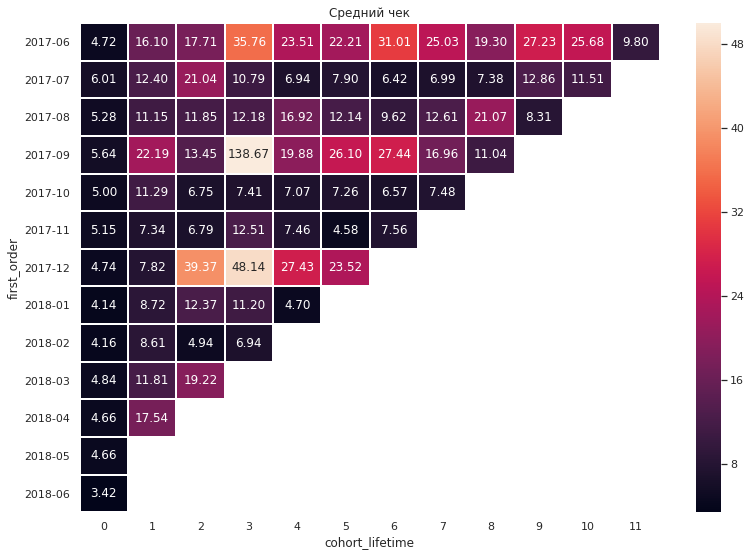

In [63]:
plt.figure(figsize=(13, 9))
plt.title('Средний чек')
sns.heatmap(revenue_per_user_pivot, annot=True, fmt='.2f', linewidths=1, vmax=50)

Средний чек при повторных покупках становится больше, по сравнению со средним чеком в месяц первой покупки. Лучшие ежемесячные показатели среднего чека у покупателей июньской, сентябрьской и декабрьской когорт.


##### 4.Сколько денег приносят? (LTV)

In [64]:
# Посчитаем количество новых покупателей за каждый месяц
cohort_sizes = orders.groupby('first_order').agg({'uid':'nunique'}).reset_index()
cohort_sizes.columns = ['first_order', 'new_buyers']
cohort_sizes

,first_order,new_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [65]:
# Сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку.
cohorts = orders.groupby(['first_order', 'buy_ts']).agg({'revenue':'sum'}).reset_index()
cohorts

,first_order,buy_ts,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58
...,...,...,...
74,2018-03-01,2018-05-01,1114.87
75,2018-04-01,2018-04-01,10600.69
76,2018-04-01,2018-05-01,1209.92
77,2018-05-01,2018-05-01,13925.76


In [66]:
# Добавим в таблицу cohorts данные о том, сколько людей первый раз совершили покупку в каждый месяц
report = pd.merge(cohort_sizes, cohorts, on='first_order')
report

,first_order,new_buyers,buy_ts,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58
...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87
75,2018-04-01,2276,2018-04-01,10600.69
76,2018-04-01,2276,2018-05-01,1209.92
77,2018-05-01,2988,2018-05-01,13925.76


In [67]:
# Добавим столбец с возрастом когорты
report['age'] = (report['buy_ts'] - report['first_order']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report

,first_order,new_buyers,buy_ts,revenue,age
0,2017-06-01,2023,2017-06-01,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,4
...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,2
75,2018-04-01,2276,2018-04-01,10600.69,0
76,2018-04-01,2276,2018-05-01,1209.92,1
77,2018-05-01,2988,2018-05-01,13925.76,0


In [68]:
# Разделим валовую прибыль когорт за каждый месяц на общее число пользователей в каждой когорте.
# Cебестоимость в данном случае нам неизвестна, и скорее всего она незначительна, т.к. для изготовления Яндекс.Афиши 
# не нужно дополнительно что-то покупать. Тогда маржинальность будет 100%. 
report['ltv'] = report['revenue'] / report['new_buyers']
# Визуализируем когорты в виде сводной таблицы и выведем накопительный ltv по месяцам, с окргулением до 2х знаков.
result = report.pivot_table(
        index='first_order', 
        columns='age', 
        values='ltv', 
        aggfunc='mean')
result = result.cumsum(axis=1).round(2)
result

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.60,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.50,7.66,7.78,7.92,8.08,8.23,8.39,NaN
2017-08-01,5.28,5.75,6.21,6.60,7.09,7.38,7.59,7.99,8.28,8.47,NaN,NaN
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,NaN,NaN,NaN
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,NaN,NaN,NaN,NaN
2017-11-01,5.15,5.55,5.75,6.08,6.23,6.28,6.40,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.74,5.00,5.92,6.99,7.30,7.64,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.14,4.43,4.73,4.88,4.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.16,4.44,4.51,4.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


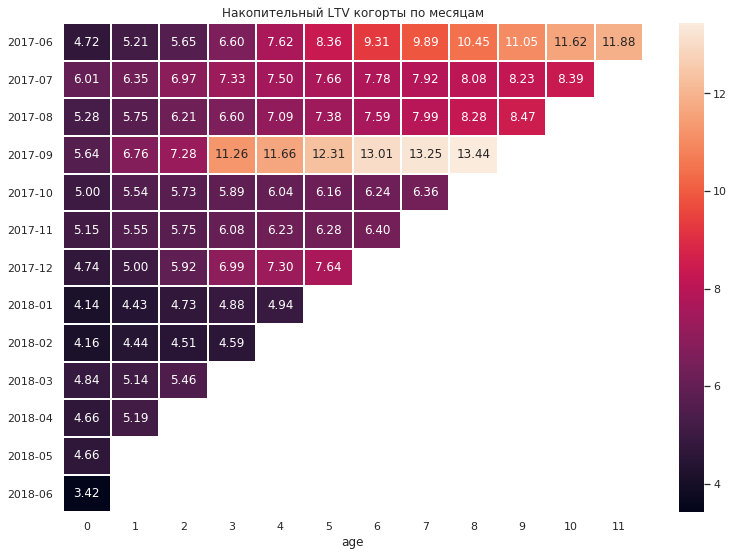

In [69]:
plt.figure(figsize=(13, 9))
plt.title('Накопительный LTV когорты по месяцам')
result.index = result.index.strftime('%Y-%m')
sns.heatmap(result, annot=True, fmt='.2f', linewidths=1)
plt.xticks
plt.show()

In [70]:
print('Средний LTV {:.2f}'.format(result[5].mean()), 'у.е. за шесть месяцев')

Средний LTV 7.97 у.е. за шесть месяцев


Каждый покупатель приносит от 6,16 до 12,31 у.е. за 6 есяцев. Наибольшей ценностью обладают покупатели сентябрьской когорты с LTV равным 12.31 у.е. за 6 месяцев. В два раза меньше LTV у когорты октября (6,16 у.е.) - это наименьший показатель за рассматриваемый период. В целом за период в пол года средний LTV составил 7.97 у.е.

### Маркетинг <a name="fifth-bullet"></a>

    1.Сколько денег потратили? Всего / на каждый источник / по времени
    2.Сколько стоило привлечение одного покупателя из каждого источника?
    3.На сколько окупились расходы? (ROI)

##### 1.Сколько денег потратили? Всего / на каждый источник / по времени

In [71]:
print('Всего на маркетинг потратили:', costs['costs'].sum(), 'у.е.')

Всего на маркетинг потратили: 329131.62 у.е.


In [72]:
print('Всего заработали:', orders['revenue'].sum(), 'у.е.')

Всего заработали: 252057.2 у.е.


За год затраты на рекламу оказались на 77 тыс.у.е. больше полученной выручки.

In [73]:
# Посмотрим на количество посещений из каждого источника
visits['source_id'].value_counts()

4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: source_id, dtype: int64

Больше всего людей приходит из 4 источника привлечения.

In [74]:
# Сколько денег потратили на каждый источник
costs.groupby('source_id')['costs'].sum()

source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64

Почти половину всех рекламных расходов потратили на источник №3.

In [75]:
# Определим расходы на каждый источник по месяцам 
costs['costs_month'] = costs['dt'].astype('datetime64[M]')
costs_by_source = costs.groupby(['source_id', 'costs_month'])['costs'].sum().reset_index()
costs_by_source_table = costs_by_source.pivot_table(index='costs_month', columns='source_id', values='costs')
costs_by_source_table

source_id,1,2,3,4,5,9,10
costs_month,,,,,,,
2017-06-01,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
2017-07-01,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2017-08-01,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
2017-09-01,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
2017-10-01,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24
2017-11-01,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36
2017-12-01,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86
2018-01-01,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35
2018-02-01,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88


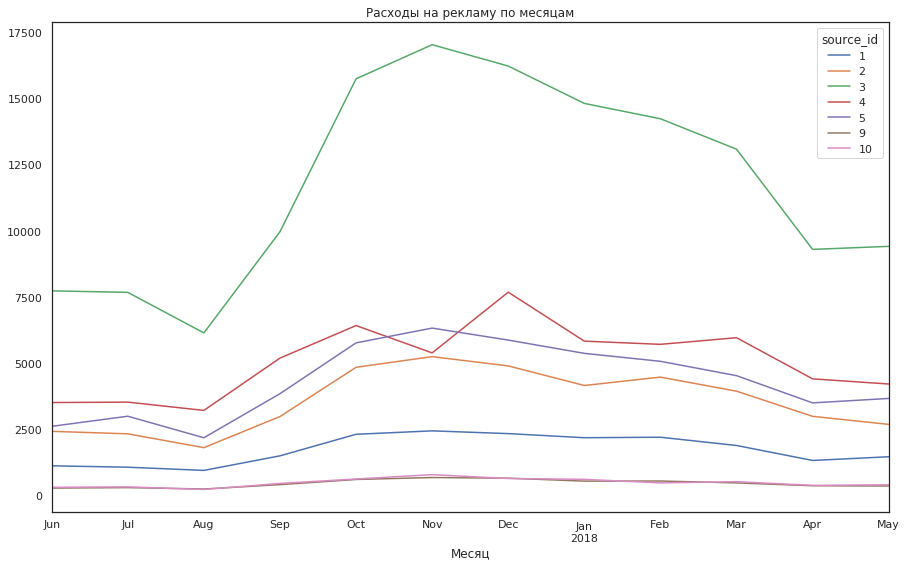

In [76]:
costs_by_source_table.plot(figsize=(15, 9))

plt.title('Расходы на рекламу по месяцам')
plt.xlabel('Месяц')
plt.show()

Всего на маркетинг потратили 329131.62 у.е. Из них 42,9% (141321 у.е.) использовано на источник 3. Больше всего расходов на маркетинг было в период октябрь-декабрь.

##### 2.Сколько стоило привлечение одного покупателя из каждого источника?

In [77]:
first_orders

,uid,first_order
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01
...,...,...
36518,18445147675727495770,2017-11-01
36519,18445407535914413204,2017-09-01
36520,18445601152732270159,2018-03-01
36521,18446156210226471712,2018-02-01


In [78]:
# Определим первый источник из которого был привлечен покупатель и посчитаем по нему выручку
visits_new = pd.merge(visits, first_orders, on='uid')
users = visits_new[['uid', 'source_id', 'start_ts', 'first_order']]
first_visit = visits_new.groupby('uid', as_index=False)['start_ts'].min()
first_visit.columns = ['uid', 'first_order_time']
users = users.merge(first_visit, on = 'uid')
users = users[users['start_ts'] == users['first_order_time']]
users['first_order_time'] = users['first_order_time'].astype('datetime64[M]')
users = users.merge(orders.groupby('uid', as_index=False)['revenue'].sum(), on='uid', how='left')
users = users.dropna().reset_index(drop=True)
users

,uid,source_id,start_ts,first_order,first_order_time,revenue
0,16174680259334210214,4,2018-03-09 20:05:00,2018-03-01,2018-03-01,2.33
1,16007536194108375387,5,2017-09-03 21:35:00,2017-09-01,2017-09-01,5.50
2,8056418121947262981,2,2017-06-04 14:17:00,2017-06-01,2017-06-01,466.57
3,18188358787673499603,3,2018-02-10 12:17:00,2018-02-01,2018-02-01,0.79
4,2307401184189569202,4,2017-09-23 23:27:00,2017-09-01,2017-09-01,3.67
...,...,...,...,...,...,...
36518,6752020629696526518,3,2017-12-04 12:42:00,2017-12-01,2017-12-01,4.15
36519,11750532881998794555,4,2017-11-20 23:33:00,2017-11-01,2017-11-01,3.67
36520,11202626539189016002,4,2017-11-29 20:27:00,2017-11-01,2017-11-01,3.05
36521,12734910664455613822,10,2018-04-23 21:11:00,2018-04-01,2018-04-01,0.49


In [79]:
# Сформируем таблицу cac по источникам
sources = users.groupby(['source_id', 'first_order_time'], as_index=False).agg({'uid':'count', 'revenue':'sum'})
sources.columns = ['source_id', 'costs_month', 'users', 'revenue']
sources['costs_month'] = sources['costs_month'].astype('datetime64[M]')
#sources = sources.merge(costs.groupby(['source_id', 'costs_month'], as_index=False)['costs'].sum(), on=['source_id', 'costs_month'])
sources = sources.merge(costs_by_source, on=['source_id', 'costs_month'])

sources['cac'] = sources['costs'] / sources['users']
sources

,source_id,costs_month,users,revenue,costs,cac
0,1,2017-06-01,240,9910.69,1125.61,4.690042
1,1,2017-07-01,184,2341.21,1072.88,5.830870
2,1,2017-08-01,126,2624.27,951.81,7.554048
3,1,2017-09-01,248,2414.97,1502.01,6.056492
4,1,2017-10-01,350,3252.30,2315.75,6.616429
...,...,...,...,...,...,...
79,10,2018-01-01,103,369.68,614.35,5.964563
80,10,2018-02-01,113,261.92,480.88,4.255575
81,10,2018-03-01,166,545.28,526.41,3.171145
82,10,2018-04-01,98,258.70,388.25,3.961735


In [80]:
sources['cac'].describe()

count    84.000000
mean      8.559451
std       4.498939
min       1.852078
25%       5.364411
50%       7.455392
75%      11.011905
max      26.677857
Name: cac, dtype: float64

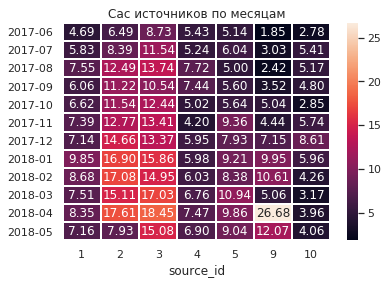

<Figure size 720x720 with 0 Axes>

In [81]:
sources_pivot = sources.pivot_table(index='costs_month', columns='source_id', values='cac', aggfunc = 'sum')
sources_pivot.index = sources_pivot.index.strftime('%Y-%m')
ax = sns.heatmap(sources_pivot, annot=True, fmt='.2f', linewidths=1)
plt.title('Cac источников по месяцам')
plt.figure(figsize=(10, 10))
plt.xticks
plt.show()

В среднем, привлечение одного покупателя обошлось 8,56 у.е. Самые "дорогие" покупатели у источников 2 и 3. Т.к. по вложенным в рекламу средствам лидирует источник №3, то и высокую стоимость привлечения одного покупателя у него можно объяснить. А вот с источником №2, похоже что-то не так, и он привлекает меньше пользователей, чем например, №4 и №5, расходов на которые было больше, но их cac при этом меньше. Самые низкие значения cac у источника №10.


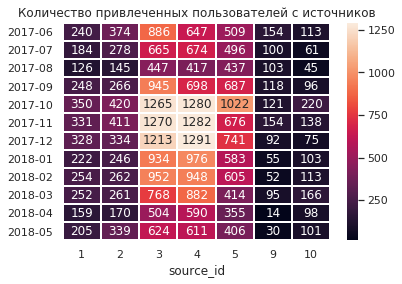

<Figure size 1440x1080 with 0 Axes>

In [82]:
users_pivot = sources.pivot_table(index='costs_month', columns='source_id', values='users', aggfunc = 'sum')
users_pivot.index = users_pivot.index.strftime('%Y-%m')
ax = sns.heatmap(users_pivot, annot=True, fmt='.0f', linewidths=1)
plt.title('Количество привлеченных пользователей с источников')
plt.figure(figsize=(20, 15))
plt.xticks
plt.show()


Больше всего пользователей привлекают источники 3,4 и 5, но в отличие от №3, стоимость привлечения одного пользователя у №4 и №5 значительно ниже.

##### 3. На сколько окупились расходы? (ROI)

In [83]:
# Определяем источник пользователя
sources_first = visits.sort_values(by = ['uid', 'start_ts']).groupby('uid').agg({'source_id': 'first'})
sources_first

,source_id
uid,
11863502262781,3
49537067089222,2
297729379853735,3
313578113262317,2
325320750514679,5
...,...
18446403737806311543,5
18446424184725333426,4
18446556406699109058,3


In [84]:
# Соединяем первые покупки и источники 
payers = orders.groupby('uid').agg({'buy_ts': 'min'}).merge(sources_first, on = 'uid').reset_index()
payers = payers.rename(columns = {'buy_ts': 'first_buy'})
payers

,uid,first_buy,source_id
0,313578113262317,2018-01-01,2
1,1575281904278712,2017-06-01,10
2,2429014661409475,2017-10-01,3
3,2464366381792757,2018-01-01,5
4,2551852515556206,2017-11-01,5
...,...,...,...
36518,18445147675727495770,2017-11-01,5
36519,18445407535914413204,2017-09-01,3
36520,18445601152732270159,2018-03-01,2
36521,18446156210226471712,2018-02-01,3


In [85]:
# Для расчета ltv создадим таблицу
ltv = payers.merge(orders, on = 'uid')
ltv['lifetime'] = ((ltv['buy_ts'] - ltv['first_buy']) / np.timedelta64(1,'M')).round().astype(int)
ltv = ltv.pivot_table(index = 'source_id', columns = 'lifetime', values = 'revenue', aggfunc = 'sum').fillna(0)
ltv = ltv.cumsum(axis = 1)
ltv

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
source_id,,,,,,,,,,,,
1,18103.37,20775.35,23058.20,25168.62,26341.53,27074.56,27821.17,28882.76,29833.78,30395.74,30773.13,31090.55
2,23177.60,28149.57,33781.81,39437.24,41894.61,43758.04,45041.88,45733.40,46196.43,46426.87,46821.79,46923.61
3,47009.04,49834.69,51355.12,52388.21,53132.34,53630.28,53913.18,54173.47,54369.04,54444.30,54490.71,54511.24
4,46901.20,48824.79,49809.56,51164.64,52200.81,53335.55,55109.65,55525.60,55721.73,56126.38,56661.77,56696.83
5,33552.31,35301.68,36727.86,47129.23,48503.39,50192.30,51066.02,51663.73,52016.09,52487.67,52579.23,52624.02
7,1.22,1.22,1.22,1.22,1.22,1.22,1.22,1.22,1.22,1.22,1.22,1.22
9,4235.05,4542.44,4844.14,5086.08,5241.60,5380.70,5498.83,5588.32,5731.30,5750.05,5759.40,5759.40
10,4204.68,4291.15,4327.62,4379.00,4402.84,4416.13,4427.31,4443.61,4446.97,4450.33,4450.33,4450.33


In [86]:
# Добавим размеры когорт и поделим на них
cohort_sizes = payers.groupby('source_id').agg({'uid': 'nunique'}).rename(columns = {'uid': 'cohort_size'})
ltv = ltv.merge(cohort_sizes, on = 'source_id')
ltv = ltv.div(ltv['cohort_size'], axis = 0).drop(columns = 'cohort_size')
ltv

,0,1,2,3,4,5,6,7,8,9,10,11
source_id,,,,,,,,,,,,
1,6.244695,7.166385,7.953846,8.681828,9.086419,9.339276,9.596816,9.963008,10.291059,10.484905,10.615085,10.724577
2,6.610839,8.028970,9.635428,11.248500,11.949404,12.480901,12.847085,13.044324,13.176392,13.242119,13.354760,13.383802
3,4.488594,4.758397,4.903573,5.002216,5.073268,5.120814,5.147826,5.172679,5.191353,5.198539,5.202970,5.204931
4,4.555284,4.742112,4.837758,4.969371,5.070009,5.180220,5.352530,5.392929,5.411978,5.451280,5.503280,5.506685
5,4.840905,5.093303,5.299071,6.799773,6.998036,7.241711,7.367771,7.454008,7.504846,7.572886,7.586096,7.592558
7,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000
9,3.892509,4.175037,4.452335,4.674706,4.817647,4.945496,5.054072,5.136324,5.267739,5.284972,5.293566,5.293566
10,3.163792,3.228856,3.256298,3.294959,3.312897,3.322897,3.331309,3.343574,3.346102,3.348631,3.348631,3.348631


In [87]:
# Посчитаем САС
cac = costs.groupby('source_id').agg({'costs': 'sum'}).reset_index()\
            .merge(cohort_sizes.reset_index(), left_on = 'source_id', right_on='source_id')
cac['cac'] = cac['costs'] / cac['cohort_size']
cac = cac.set_index('source_id')
cac


,costs,cohort_size,cac
source_id,,,
1,20833.27,2899,7.186364
2,42806.04,3506,12.209367
3,141321.63,10473,13.493901
4,61073.60,10296,5.931779
5,51757.10,6931,7.467479
9,5517.49,1088,5.071222
10,5822.49,1329,4.381106


In [88]:
cac.cac.mean()

7.963031402494954

In [89]:
# Посчитаем ROMI
romi = ltv.merge(cac[['cac']], on = 'source_id')
romi = romi.div(romi['cac'], axis = 0).drop(columns = 'cac')
romi

,0,1,2,3,4,5,6,7,8,9,10,11
source_id,,,,,,,,,,,,
1,0.868964,0.997220,1.106797,1.208097,1.264397,1.299583,1.335420,1.386377,1.432026,1.459000,1.477115,1.492351
2,0.541456,0.657607,0.789183,0.921301,0.978708,1.022240,1.052232,1.068387,1.079204,1.084587,1.093813,1.096191
3,0.332639,0.352633,0.363392,0.370702,0.375968,0.379491,0.381493,0.383335,0.384718,0.385251,0.385579,0.385725
4,0.767946,0.799442,0.815566,0.837754,0.854720,0.873300,0.902348,0.909159,0.912370,0.918996,0.927762,0.928336
5,0.648265,0.682064,0.709620,0.910585,0.937135,0.969766,0.986648,0.998196,1.005004,1.014115,1.015884,1.016750
9,0.767568,0.823280,0.877961,0.921810,0.949997,0.975208,0.996618,1.012837,1.038751,1.042150,1.043844,1.043844
10,0.722145,0.736996,0.743259,0.752084,0.756178,0.758461,0.760381,0.763180,0.763757,0.764335,0.764335,0.764335


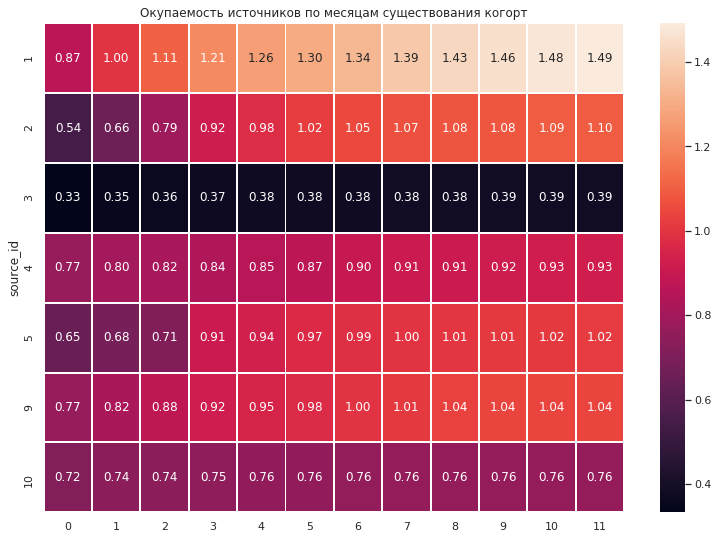

In [90]:
plt.figure(figsize=(13, 9))
plt.title('Окупаемость источников по месяцам существования когорт')
sns.heatmap(romi, annot=True, fmt='.2f', linewidths=1)
plt.xticks
plt.show()

Большинство источников привлечения покупателей за полгода не окупаются. К шестому месяцу окупились только источники 1 и 2. Совсем не окупилось даже за год источники 3, 4, 10.

## Вывод <a name="sixth-bullet"></a>

Больше всего людей посещают сайт Яндекс.Афиши с конца сентября по конец марта. Среднее количество посещений в неделю составляет - 5724 чел., в день - 907 чел. Максимальное число пользователей (10716 чел.) заходило на сайт на неделе в конце ноября 2017г. (скорее всего в период проведения "черной пятницы") - за счет этого ноябрь стал самым "посещаемым" месяцем (32797чел.). Меньше всего пользователей посещают сайт в летние месяцы, что можно объяснить периодом дач и отпусков. В августе сайт посетило меньше всего пользователей (11631чел.). Медиана посетителей за месяц - 24240чел.


Среднее количество сессий в день за год - 987.
Как правило одна сессия длится от 2 до 14 минут, а чаще всего она занимает 5 минут. 


Средний Retention Rate в первые месяцы по когортам составил 6,5%. В когортах с июня по ноябрь этот показатель выше, среднее - 7,5%. Со временем процент удержания пользователей падает. И если рассматривать его за одинаковый период жизни когорты, то у каждой последующей когорты Retention Rate снижается быстрее. Так, например, у июньской когорты к шестому месяцу существования Retention Rate составил 7,1%, а у ноябрьской за этот же период 2,3%. Возможно, тут сказывается сезонность. К апрелю у большинтва когорт Retention Rate в районе 2-2,9%.


Всего за год 36523 пользователя совершили 50415 покупок. В среднем за пол года каждый покупатель делает 1,44 покупок. При этом, большинство покупателей (82,77% - 30231чел.) совершают покупку только один раз. Среднее количество покупок на пользователя за год - 1,38 раза.
82% пользователей совершают покупку в день первого посещения.
За весь период средний чек покупателя составил 4,99 у.е., медиана - 2,50 у.е.
При повторных покупках средний чек становится больше, по сравнению со средним чеком в месяц первой покупки. Лучшие ежемесячные показатели среднего чека у покупателей июньской, сентябрьской и декабрьской когорт.



В целом за период в пол года средний LTV составил 7.97 у.е. К шестому месяцу существования когорты, каждый покупатель приносит от 6,16 до 12,31 у.е. валовой прибыли. Наибольшей ценностью обладают покупатели сентябрьской когорты с LTV равным 12.31 у.е. за 6 месяцев. В два раза меньше LTV у когорты октября (6,16 у.е.) - это наименьший показатель за рассматриваемый период. 


Затраты на маркетинг за год составили 329131.62 у.е., что на 77 тыс. у.е. больше полученной выручки. Из них 42,9% (141321 у.е.) использовано на источник 3. Больше всего расходов на маркетинг было в период октябрь-декабрь.


В среднем, привлечение одного покупателя обошлось 8,56 у.е. Самые "дорогие" покупатели у источников 2 и 3. Т.к. по вложенным в рекламу средствам лидирует источник №3, то и высокую стоимость привлечения одного покупателя у него можно объяснить. А вот с источником №2, похоже что-то не так, и он привлекает меньше пользователей, чем например, №4 и №5, расходов на которые было больше, но их cac при этом меньше. Самые низкие значения cac у источника №10.
Большее количество пользователей привлекают источники 3,4 и 5, но в отличие от №3, стоимость привлечения одного пользователя у №4 и №5 значительно ниже.

Большинство источников привлечения покупателей за полгода не окупаются. К шестому месяцу окупились только источники 1 и 2. Совсем не окупились даже за год источники 3, 10 и 4. При этом 3й источник скорее вредит, чем приносит пользу и, несмотря на то, что по количеству привлеченных пользователей он лидирует, выгоднее от него отказаться. В дальнейшем, в первую очередь сделать упор в рекламе на источниках № 1 и № 2. Также, думаю не стоит совсем отказываться от источников 5 и 9, которые окупаются немного дольше, т.к. через 5й источник приходит большое количество покупателей

